In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

In [2]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize = 256 # change according to system specs

trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=4) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=4) # Creating dataloader

In [3]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [4]:
use_gpu = torch.cuda.is_available()
net = LeNet()
optimizer = optim.SGD(net.parameters(), lr =0.01)
print(net)
if use_gpu:
    print('GPU is avaialble!')
    net = net.cuda()

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [5]:
criterion = nn.CrossEntropyLoss() 
learning_rate = 0.01
num_epochs = 200

train_loss = []
train_acc = []
for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        #net.zero_grad()
        optimizer.zero_grad()
        # Data feed-forward through the network
        outputs = net(inputs)
        # Predicted class is the one with maximum probability
        preds = torch.argmax(outputs,dim=1)
        # Finding the loss
        loss = criterion(outputs, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds==labels)    
        
    totalLoss = running_loss/(i+1)
    # Calculating gradients
    totalLoss.backward()
    # Updating the model parameters
    optimizer.step()
    #for f in net.parameters():
        #f.data.sub_(f.grad.data * learning_rate)
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))

Epoch 1/200 : Training loss: 2.3048 | Training Accuracy: 10.3550
Epoch 2/200 : Training loss: 2.3049 | Training Accuracy: 10.3683
Epoch 3/200 : Training loss: 2.3048 | Training Accuracy: 10.3817
Epoch 4/200 : Training loss: 2.3048 | Training Accuracy: 10.3883
Epoch 5/200 : Training loss: 2.3048 | Training Accuracy: 10.3967
Epoch 6/200 : Training loss: 2.3047 | Training Accuracy: 10.4117
Epoch 7/200 : Training loss: 2.3047 | Training Accuracy: 10.4217
Epoch 8/200 : Training loss: 2.3046 | Training Accuracy: 10.4267
Epoch 9/200 : Training loss: 2.3047 | Training Accuracy: 10.4483
Epoch 10/200 : Training loss: 2.3046 | Training Accuracy: 10.4617
Epoch 11/200 : Training loss: 2.3046 | Training Accuracy: 10.4783
Epoch 12/200 : Training loss: 2.3045 | Training Accuracy: 10.4933
Epoch 13/200 : Training loss: 2.3045 | Training Accuracy: 10.5067
Epoch 14/200 : Training loss: 2.3045 | Training Accuracy: 10.5250
Epoch 15/200 : Training loss: 2.3044 | Training Accuracy: 10.5317
Epoch 16/200 : Trai

Epoch 125/200 : Training loss: 2.3011 | Training Accuracy: 16.2633
Epoch 126/200 : Training loss: 2.3011 | Training Accuracy: 16.3117
Epoch 127/200 : Training loss: 2.3010 | Training Accuracy: 16.3550
Epoch 128/200 : Training loss: 2.3010 | Training Accuracy: 16.4017
Epoch 129/200 : Training loss: 2.3010 | Training Accuracy: 16.4533
Epoch 130/200 : Training loss: 2.3010 | Training Accuracy: 16.5000
Epoch 131/200 : Training loss: 2.3010 | Training Accuracy: 16.5317
Epoch 132/200 : Training loss: 2.3009 | Training Accuracy: 16.5750
Epoch 133/200 : Training loss: 2.3008 | Training Accuracy: 16.6267
Epoch 134/200 : Training loss: 2.3008 | Training Accuracy: 16.6717
Epoch 135/200 : Training loss: 2.3008 | Training Accuracy: 16.7133
Epoch 136/200 : Training loss: 2.3008 | Training Accuracy: 16.7533
Epoch 137/200 : Training loss: 2.3007 | Training Accuracy: 16.7833
Epoch 138/200 : Training loss: 2.3007 | Training Accuracy: 16.8250
Epoch 139/200 : Training loss: 2.3007 | Training Accuracy: 16.

Text(0, 0.5, 'Training')

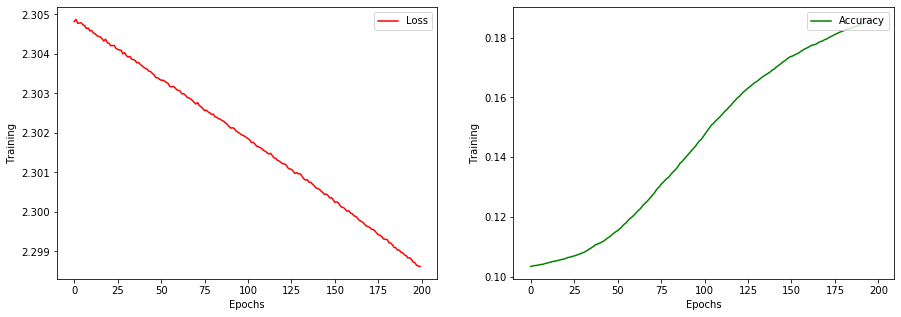

In [6]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')

In [7]:
correct_pred = 0
for data in testLoader:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net(inputs) 
    # Predicted class is the one with maximum probability
    preds = torch.argmax(output,dim=1)
    correct_pred += torch.sum(preds==labels)

test_accuracy = correct_pred.item()/10000.0
print('Testing accuracy = ',test_accuracy*100)

Testing accuracy =  18.56
